##  Project Overview
- **Goal:** Develop a machine learning model that predicts the expected electric range based on given data.
- **Dataset:** https://machinehack.com/hackathons/electrics_range_estimation_model/data
- **Target Variable:** Electric Range

The data contains the following information:

1. VIN (1-10): Partial VIN number for identification.
2. County, City, State, Postal Code: Location details of the registered vehicle.
3. Model Year, Make, Model: Vehicle manufacturing details.
4. Electric Vehicle Type: Whether the vehicle is a Battery Electric Vehicle (BEV) or Plug-in Hybrid Electric Vehicle (PHEV).
5. Clean Alternative Fuel Vehicle (CAFV) Eligibility: Whether the vehicle qualifies for clean energy incentives.
6. Electric Range: The vehicle’s estimated driving range on a full charge.
7. Base MSRP: The manufacturer's suggested retail price.
8. Legislative District: The political district where the vehicle is registered.
9. Vehicle Location: GPS coordinates.
10. Electric Utility: The power provider for the vehicle owner.
11. 2020 Census Tract: Geographic region based on census data .us data.

e.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

##  1. Data Preview
- Shape of the dataset (rows, columns)
- Data types and structure
- Sample rows (head and tail)

In [2]:
ev_population_data = pd.read_csv(r"D:\Protfolio_Projects\battery-health-prediction\Dataset\Train.csv")
ev_population_data .head()

Unnamed: 0  VIN (1-10)     County         City State  Postal Code  \
0           0  5YJSA1DN0C   Thurston      Olympia    WA      98502.0   
1           1  WBY1Z6C30H       King     Bellevue    WA      98004.0   
2           2  WBY7Z6C52J       King         Kent    WA      98031.0   
3           3  WBY1Z2C58F       King  Woodinville    WA      98072.0   
4           4  5YJSA1E45G  Snohomish      Bothell    WA      98012.0   

   Model Year   Make    Model           Electric Vehicle Type  \
0        2012  TESLA  MODEL S  Battery Electric Vehicle (BEV)   
1        2017    BMW       I3  Battery Electric Vehicle (BEV)   
2        2018    BMW       I3  Battery Electric Vehicle (BEV)   
3        2015    BMW       I3  Battery Electric Vehicle (BEV)   
4        2016  TESLA  MODEL S  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Base MSRP  \
0           Clean Alternative Fuel Vehicle Eligible    59900.0   
1           Clean Alternative Fuel Vehicle Eligible        0.0   
2           Clean Alternative Fuel Vehicle Eligible        0.0   
3           Clean Alternative Fuel Vehicle Eligible        0.0   
4           Clean Alternative Fuel Vehicle Eligible        0.0   

   Legislative District  DOL Vehicle ID             Vehicle Location  \
0                  22.0       186637195  POINT (-122.92333 47.03779)   
1                  48.0       196789610   POINT (-122.1872 47.61001)   
2                  11.0       221792728  POINT (-122.17743 47.41185)   
3                  45.0       135735155  POINT (-122.15545 47.75448)   
4                   1.0       477081811  POINT (-122.21061 47.83448)   

                                Electric Utility  2020 Census Tract  \
0                         PUGET SOUND ENERGY INC       5.306701e+10   
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10   
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
4                         PUGET SOUND ENERGY INC       5.306105e+10   

   Electric_Range  
0           265.0  
1            81.0  
2           114.0  
3            81.0  
4           210.0

- Removing unnamed column that act as index which is not required for further analysis 

In [3]:
ev_population_data = ev_population_data.drop(columns = 'Unnamed: 0')

In [4]:
ev_population_data.shape

(9290, 17)

In [5]:
ev_population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9290 entries, 0 to 9289
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         9290 non-null   object 
 1   County                                             9290 non-null   object 
 2   City                                               9290 non-null   object 
 3   State                                              9290 non-null   object 
 4   Postal Code                                        9290 non-null   float64
 5   Model Year                                         9290 non-null   int64  
 6   Make                                               9290 non-null   object 
 7   Model                                              9290 non-null   object 
 8   Electric Vehicle Type                              9290 non-null   object 
 9   Clean Al

##  2. Missing Values
- Count of missing values per column"
- Decision: Impute / Drop / Leave as-is

In [6]:
ev_population_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Electric_Range                                       0
dtype: int64

- As there no null values we need not have to bother regarding the imputation 

##  3. Data Types and Conversions
- Identify categorical vs numerical features
- Any necessary type conversions?

In [7]:
ev_population_data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract                                    float64
Electric_Range          

- Data Type conversion is required from objects/int64 to catogorical data  

In [8]:
cat_cols = ['VIN (1-10)','County', 'City','State','Make','Model','Model Year','Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Electric Utility','Postal Code','Legislative District','DOL Vehicle ID']
for col in cat_cols:
    ev_population_data[col] = ev_population_data[col].astype('category')


- As the data description have mentioned Vehicle Location is  GPS coordinates , convert it from object datatype to 2 seperaate columns containing latitude and longitude in float datatype 

In [9]:

# Remove POINT and brackets, then split
ev_population_data[['vehicle_longitude', 'vehicle_latitude']] = ev_population_data['Vehicle Location'].str.extract(r'POINT \(([-\d\.]+) ([-\d\.]+)\)').astype(float)
print(ev_population_data[['Vehicle Location', 'vehicle_latitude', 'vehicle_longitude']].head())


              Vehicle Location  vehicle_latitude  vehicle_longitude
0  POINT (-122.92333 47.03779)          47.03779         -122.92333
1   POINT (-122.1872 47.61001)          47.61001         -122.18720
2  POINT (-122.17743 47.41185)          47.41185         -122.17743
3  POINT (-122.15545 47.75448)          47.75448         -122.15545
4  POINT (-122.21061 47.83448)          47.83448         -122.21061


- We can delete the column Vehicle Location as we have extracted required the information from it 

In [10]:
ev_population_data = ev_population_data.drop(columns = 'Vehicle Location')

In [11]:
ev_population_data.dtypes

VIN (1-10)                                           category
County                                               category
City                                                 category
State                                                category
Postal Code                                          category
Model Year                                           category
Make                                                 category
Model                                                category
Electric Vehicle Type                                category
Clean Alternative Fuel Vehicle (CAFV) Eligibility    category
Base MSRP                                             float64
Legislative District                                 category
DOL Vehicle ID                                       category
Electric Utility                                     category
2020 Census Tract                                     float64
Electric_Range                                        float64
vehicle_

##  4. Duplicates and Outliers
- Check for duplicate rows
- Initial look at outliers in numerical columns

In [12]:
ev_population_data.duplicated().sum()

0

- There are no duplicates in the dataset tom be handled

In [13]:
numeric_cols = ev_population_data.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    Q1 = ev_population_data[col].quantile(0.25)
    Q3 = ev_population_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ev_population_data[(ev_population_data[col] < lower_bound) | (ev_population_data[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")


Base MSRP: 1046 outliers
2020 Census Tract: 4 outliers
Electric_Range: 0 outliers
vehicle_longitude: 1084 outliers
vehicle_latitude: 1433 outliers


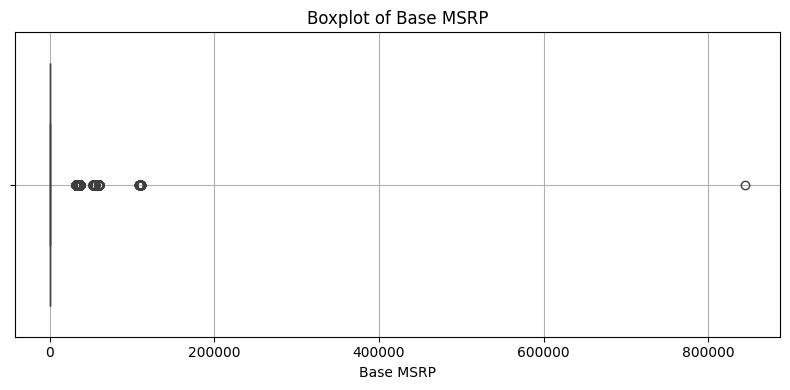

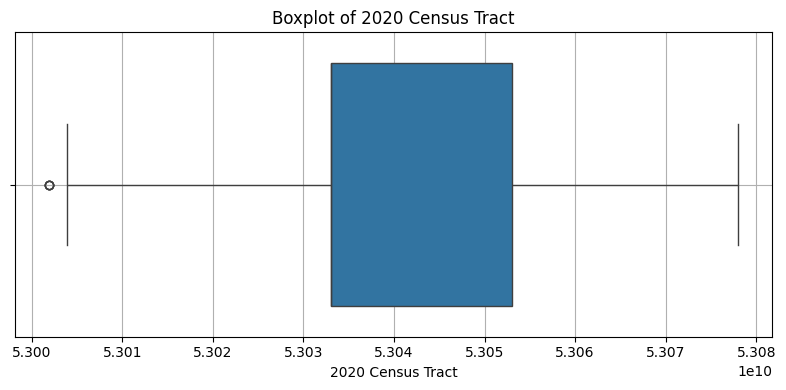

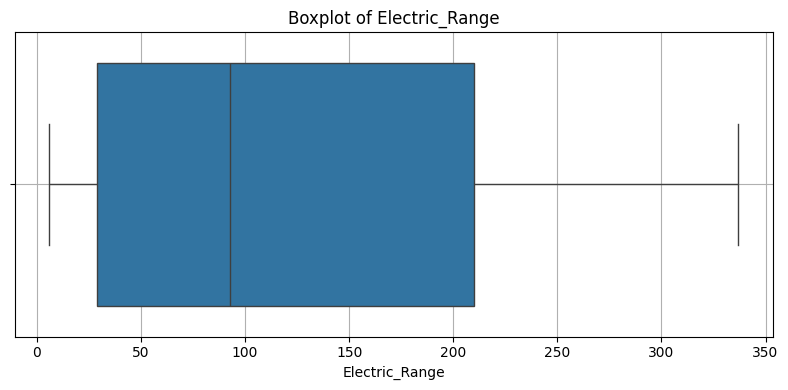

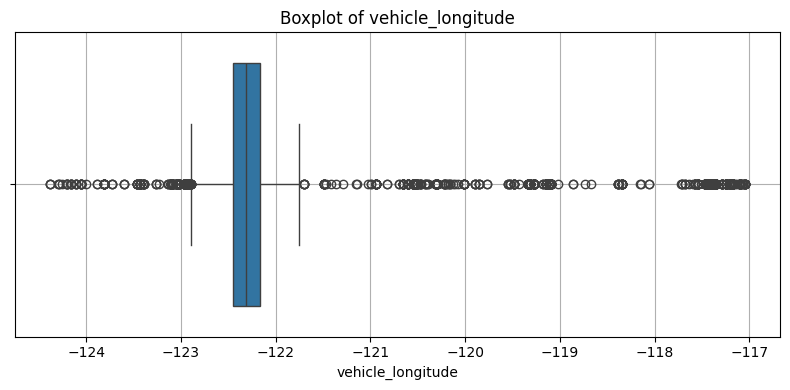

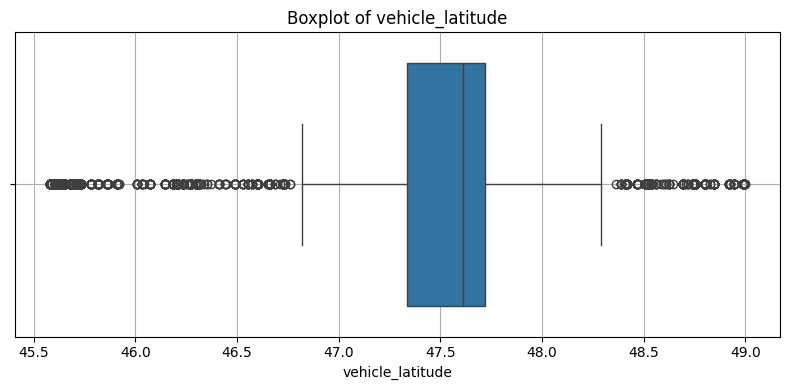

In [14]:
for col in numeric_cols :
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=ev_population_data, x=col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

- Base MSRP has outliers , but since tree based models are to be used this is not a concern 
- electric range have no outlier
- GPS coordinate features needs to be examined further as they contain outliers

In [15]:
ev_population_data['State'].unique()

['WA']
Categories (1, object): ['WA']

- As the vehicle are only from Washington so vehicle location is not required 
- In Addition to that we can remove State column as every vehicle is from same State 

In [16]:
ev_population_data = ev_population_data.drop(columns = ['State','vehicle_latitude','vehicle_longitude'])

In [17]:
ev_population_data.head()

VIN (1-10)     County         City Postal Code Model Year   Make    Model  \
0  5YJSA1DN0C   Thurston      Olympia     98502.0       2012  TESLA  MODEL S   
1  WBY1Z6C30H       King     Bellevue     98004.0       2017    BMW       I3   
2  WBY7Z6C52J       King         Kent     98031.0       2018    BMW       I3   
3  WBY1Z2C58F       King  Woodinville     98072.0       2015    BMW       I3   
4  5YJSA1E45G  Snohomish      Bothell     98012.0       2016  TESLA  MODEL S   

            Electric Vehicle Type  \
0  Battery Electric Vehicle (BEV)   
1  Battery Electric Vehicle (BEV)   
2  Battery Electric Vehicle (BEV)   
3  Battery Electric Vehicle (BEV)   
4  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Base MSRP  \
0           Clean Alternative Fuel Vehicle Eligible    59900.0   
1           Clean Alternative Fuel Vehicle Eligible        0.0   
2           Clean Alternative Fuel Vehicle Eligible        0.0   
3           Clean Alternative Fuel Vehicle Eligible        0.0   
4           Clean Alternative Fuel Vehicle Eligible        0.0   

  Legislative District DOL Vehicle ID  \
0                 22.0      186637195   
1                 48.0      196789610   
2                 11.0      221792728   
3                 45.0      135735155   
4                  1.0      477081811   

                                Electric Utility  2020 Census Tract  \
0                         PUGET SOUND ENERGY INC       5.306701e+10   
1  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
2  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10   
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10   
4                         PUGET SOUND ENERGY INC       5.306105e+10   

   Electric_Range  
0           265.0  
1            81.0  
2           114.0  
3            81.0  
4           210.0

##  5. Univariate Analysis
- Distribution of each numeric variable (histograms)
- Value counts of categorical variables (bar plots)


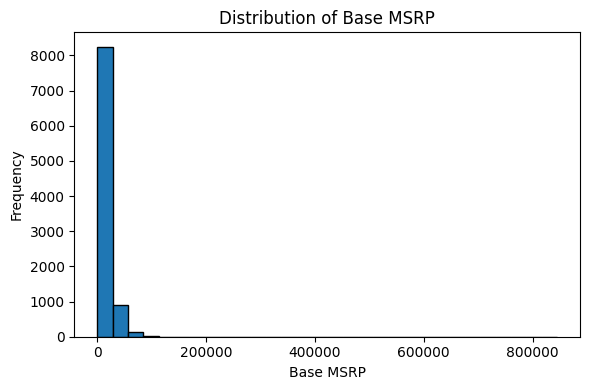

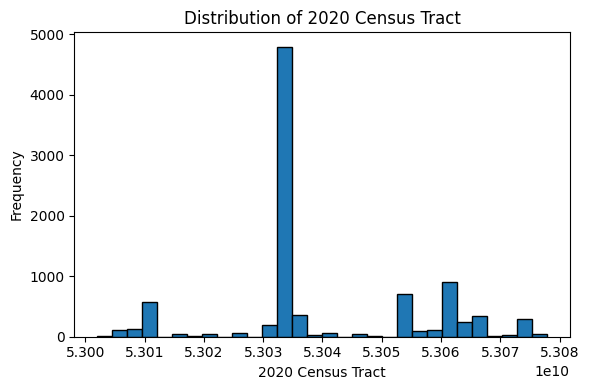

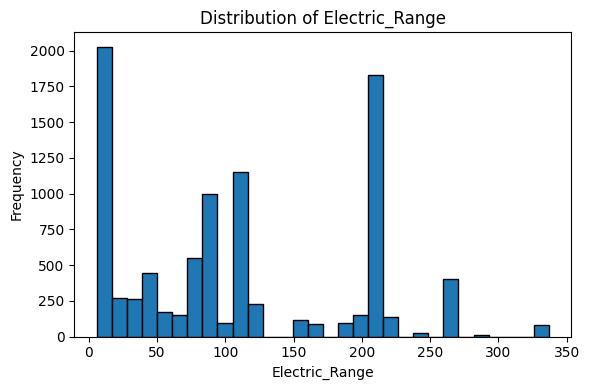

In [18]:
numeric_cols = ev_population_data.select_dtypes(include='number').columns.tolist()
for col in numeric_cols:
    
    plt.figure(figsize=(6, 4))
    ev_population_data[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

- Regionally the EV is around 5.3 as per census report
- Estimated Drive range on full charge is around 0-30 or in 200 km range
- The manufacture suggested price can be upto 200000


- Create Categorical Feature from Manufacture Suggested price and remove the original 

In [19]:
ev_population_data = ev_population_data[ev_population_data['Base MSRP'] > 0]  # Only for binning step


In [20]:
ev_population_data['retail_price_ranges'] = pd.qcut(ev_population_data['Base MSRP'], q=4, labels=['Budget', 'Mid', 'Premium'], duplicates='drop')

In [21]:
ev_population_data = ev_population_data.drop(columns = 'Base MSRP')

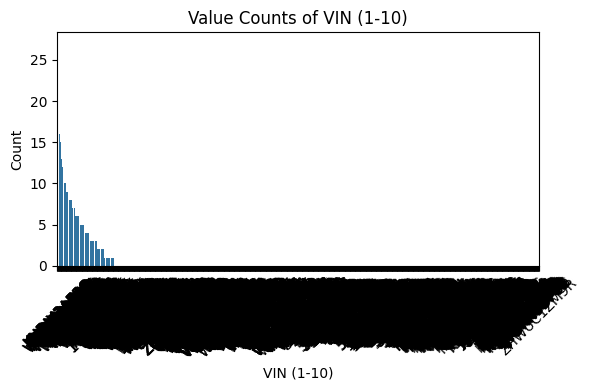

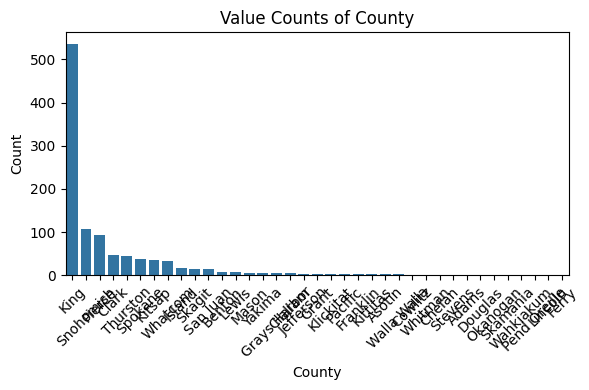

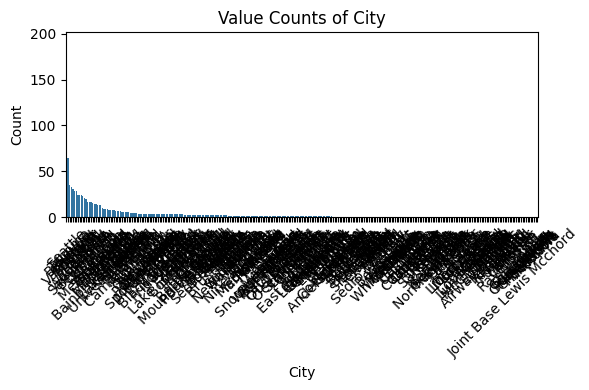

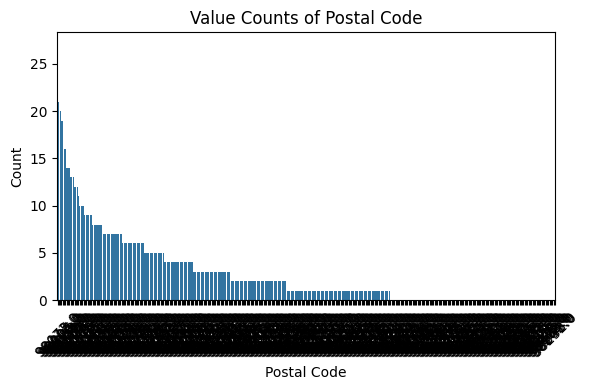

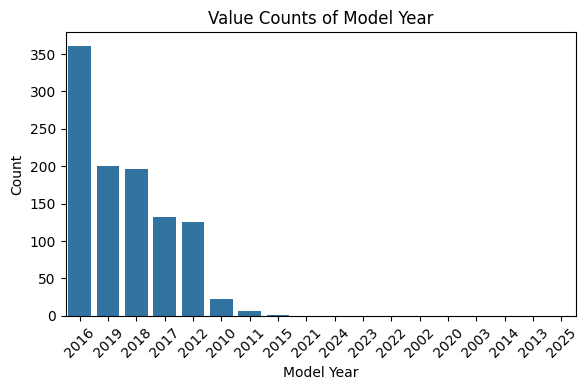

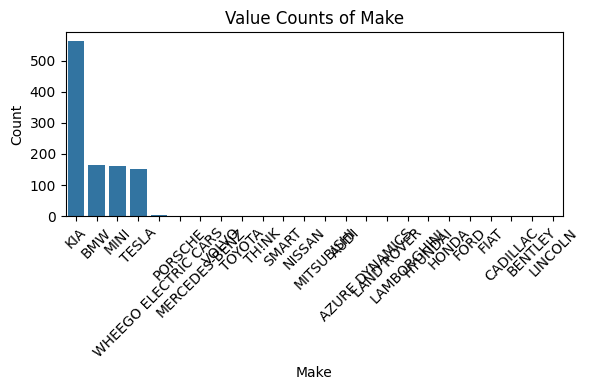

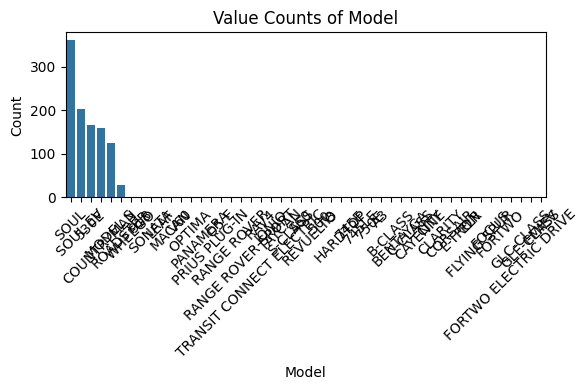

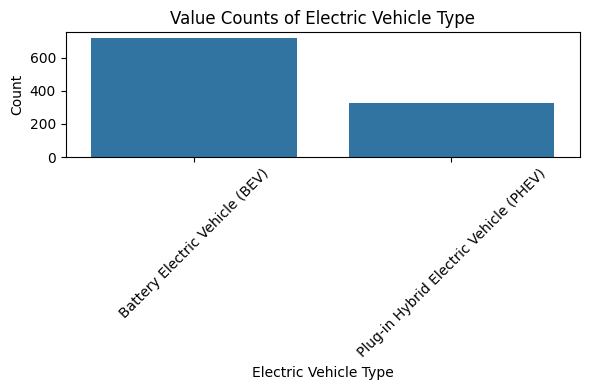

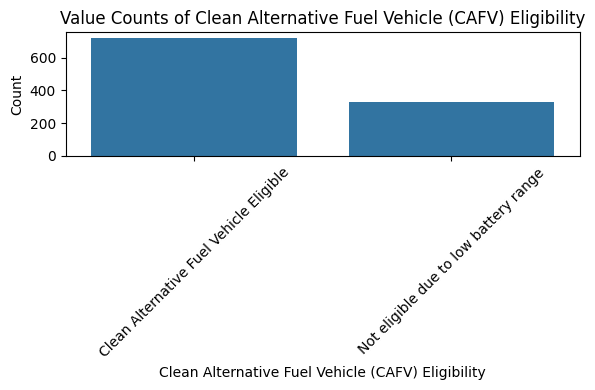

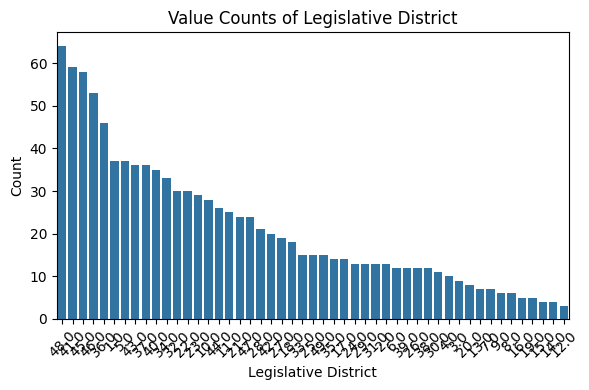

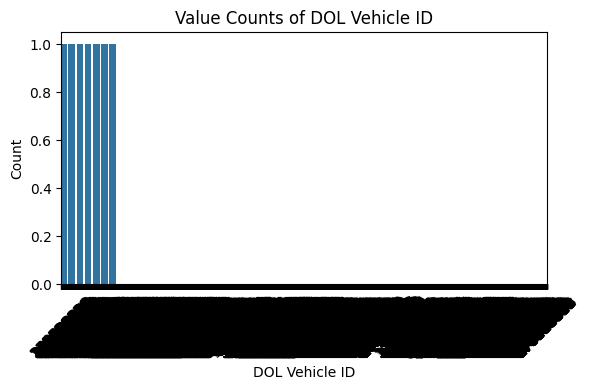

C:\Users\majes\AppData\Local\Temp\ipykernel_18324\4154405973.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


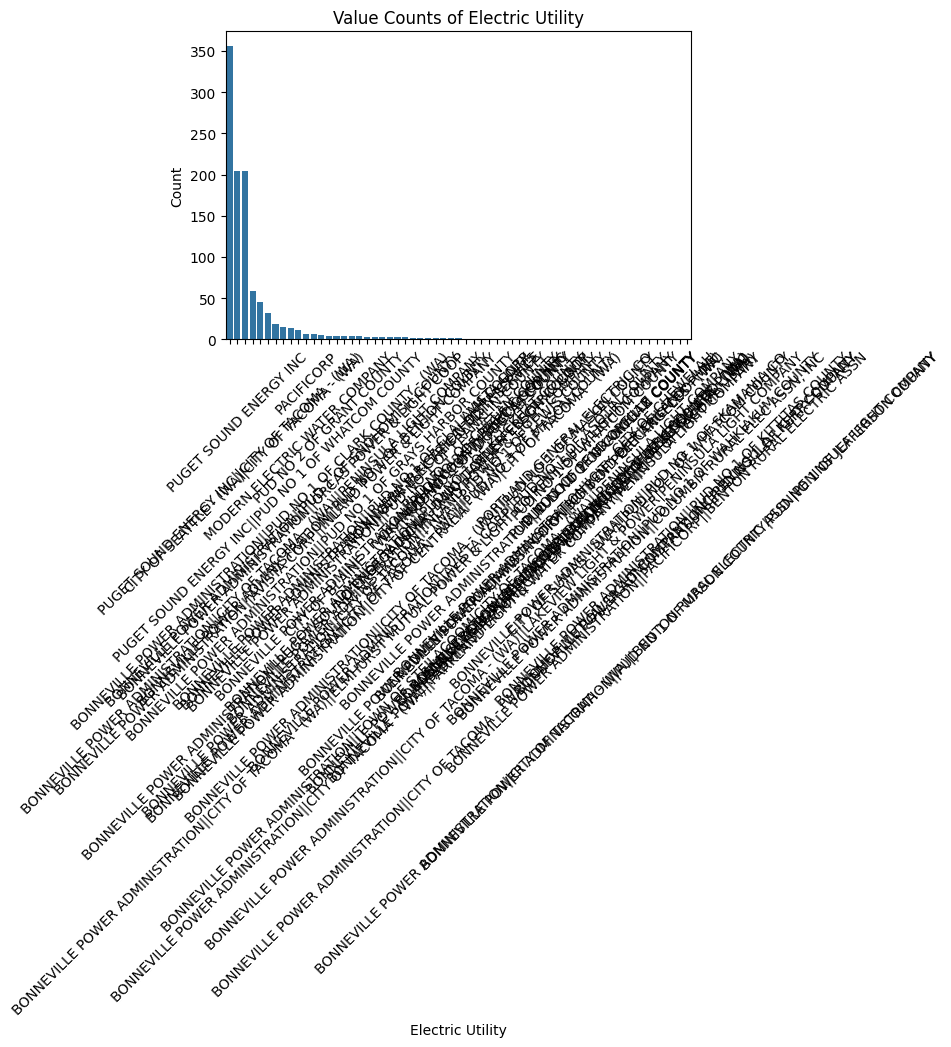

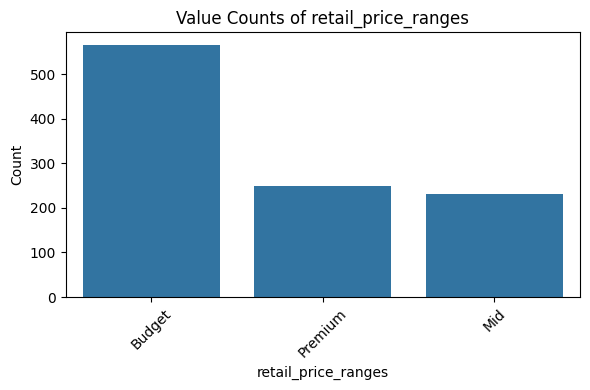

In [22]:
cat_cols = ev_population_data.select_dtypes(include='category').columns.tolist()
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=ev_population_data, x=col, order=ev_population_data[col].value_counts().index)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



- **County Distribution**:
  - Majority of Electric Vehicles (EVs) are registered in **King County**
  - Most popular city: **Seattle**

- **Model Year**:
  - EVs are most commonly from the **2017** model year
  - The trend suggests higher adoption during 2016–2019

- **Top Manufacturer**:
  - **Tesla** is the leading EV manufacturer in the dataset
  - Followed by brands like Nissan and Chevrolet

- **EV Type Breakdown**:
  - **Battery Electric Vehicles (BEV)**: ~6,000
  - **Plug-in Hybrid Electric Vehicles (PHEV)**: ~3,000

- **CAFV Eligibility** (Clean Alternative Fuel Vehicle):
  - **Eligible**: ~6,500 vehicles
  - **Not Eligible**: ~2,500 (most likely due to l
- Budget vehicles are more in number o have CAFV eligiblity 

-  As lat/lon are geospatial, not mathematical magnitudes,Don't apply log/sqrt 

## 6. Bivariate Analysis
- Compare features to target ('Electric_Range')
- Categorical vs target


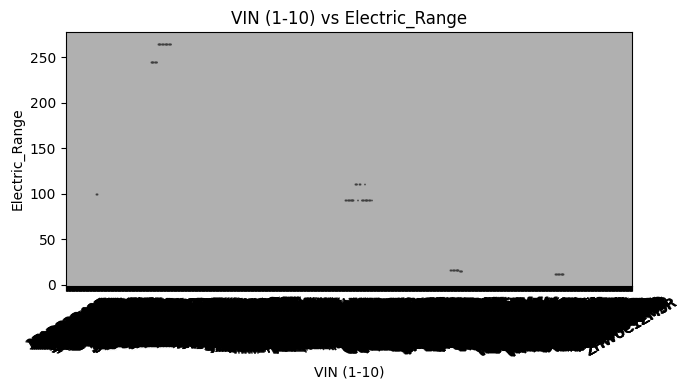

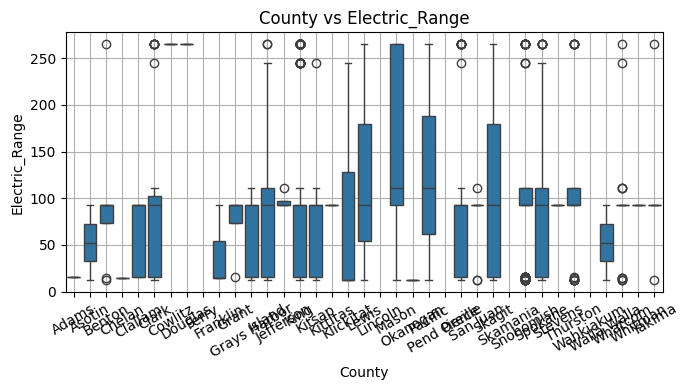

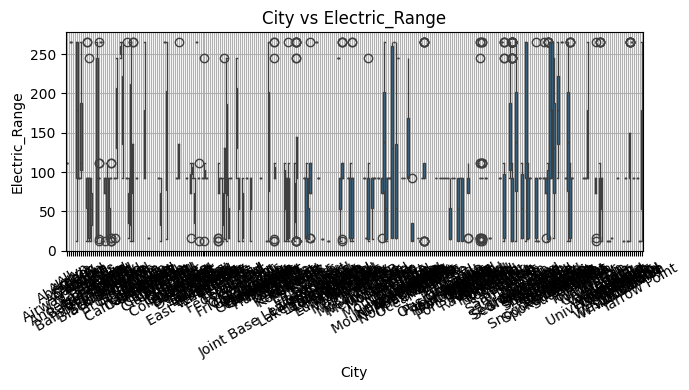

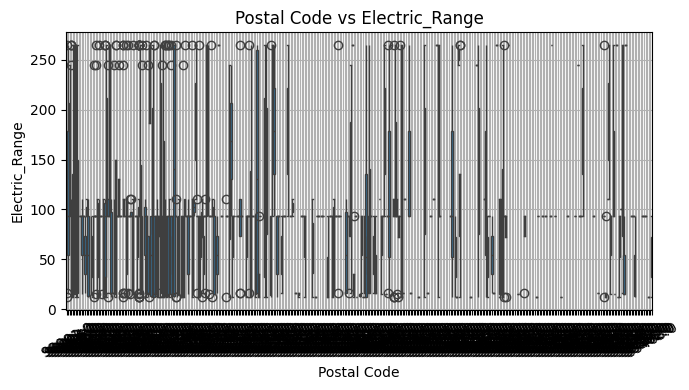

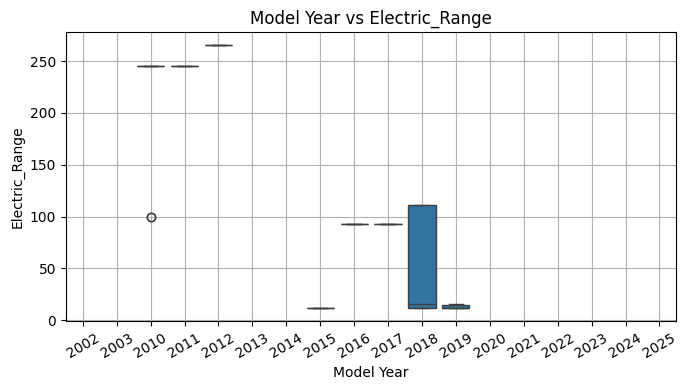

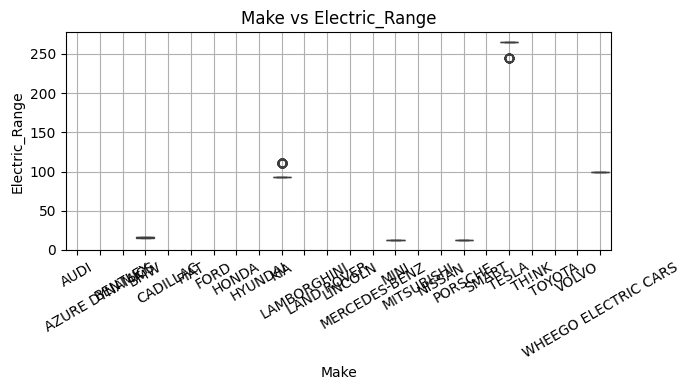

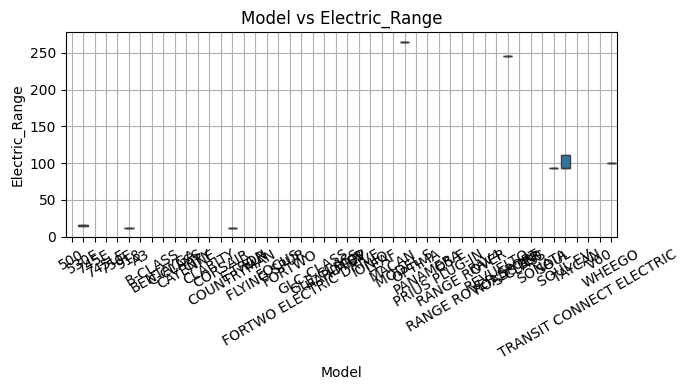

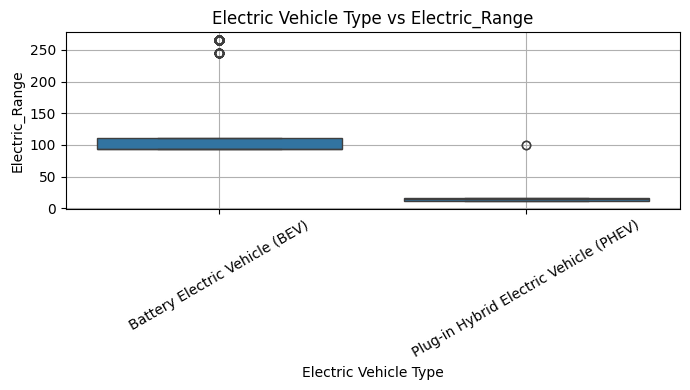

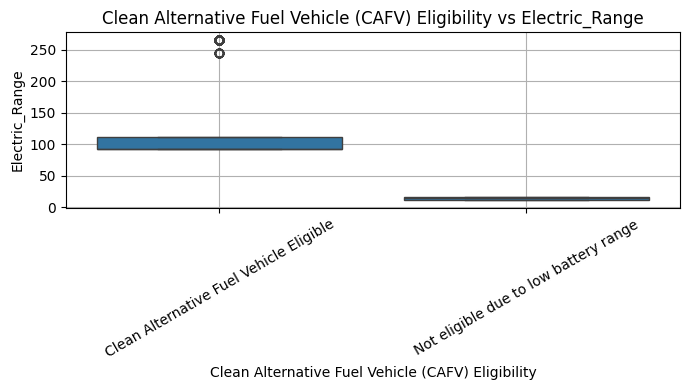

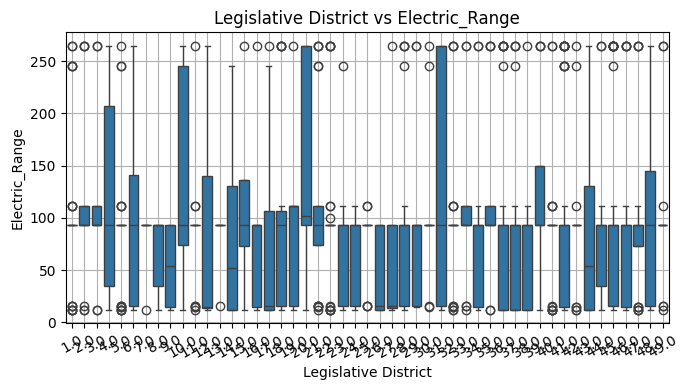

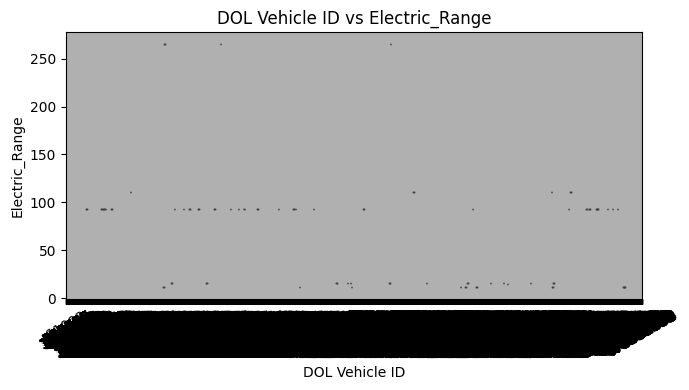

C:\Users\majes\AppData\Local\Temp\ipykernel_18324\3511008232.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


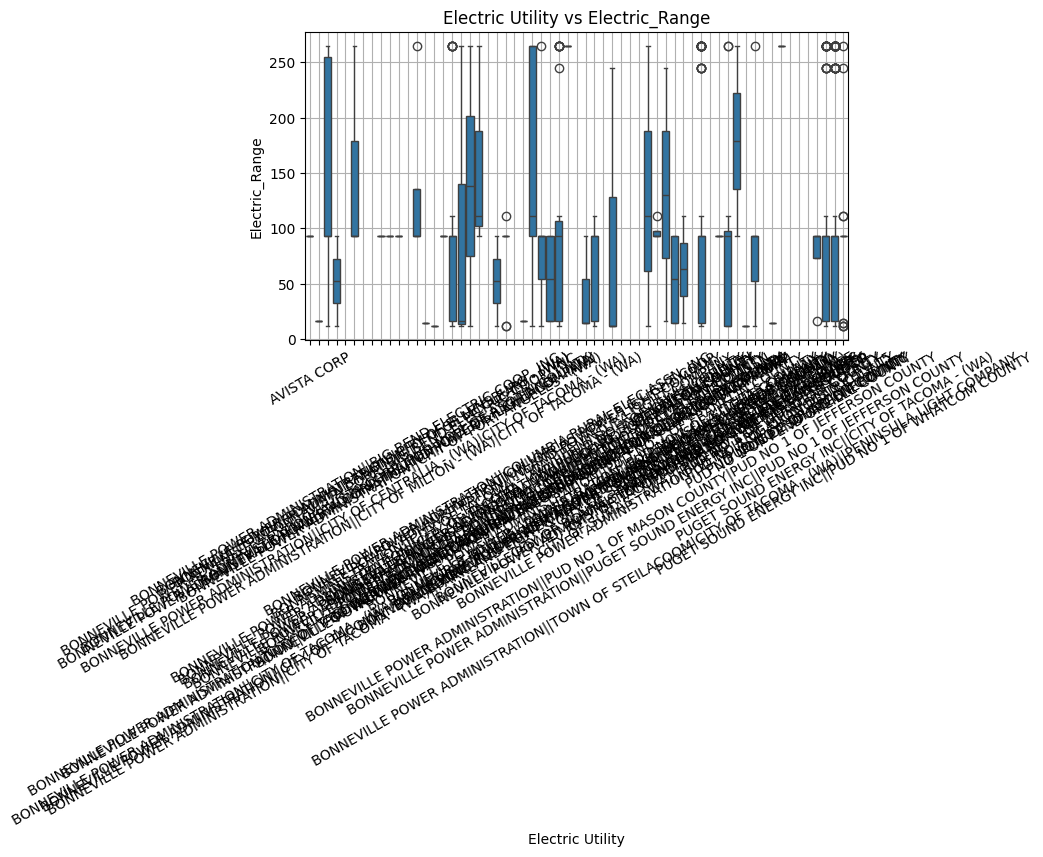

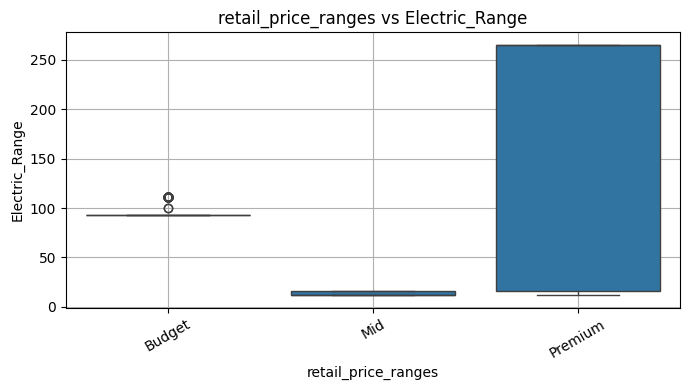

In [23]:
cat_cols = ev_population_data.select_dtypes(include='category').columns.tolist()
target = 'Electric_Range'  # or new target if updated

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=col, y=target, data=ev_population_data)
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=30)
    plt.grid(True)
    plt.tight_layout()
    plt.show()



- **County, Utility, Legislative District**:
  - Vehicles across all counties, utilities, and districts typically have an electric range between **50–200 km**
  - No significant geographical advantage in range observed

- **Model Year**:
  - Surprisingly, **newer EV models show lower average electric range** compared to older models
  - May indicate shift towards short-range city EVs or change in data collection

- **Make (Manufacturer)**:
  - **Nissan** vehicles tend to have higher electric ranges on average than other brands
  - Tesla and Chevrolet follow in performance

- **EV Type**:
  - **Battery Electric Vehicles (BEV)** have significantly higher ranges than **Plug-in Hybrid Electric Vehicles (PHEV)**
  - Consistent with technical specifications

- **CAFV Eligibility**:
  - **CAFV-eligible vehicles** (Clean Alternative Fuel Vehicles) have notably hig
  r electric range
  - Vehicles **not eligible** usually fall below requi

- Premium vehicles have more Rangered range thresholds



In [24]:
cols_to_encode = ['County',
 'Model Year',
 'Make',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Electric Utility',
 'retail_price_ranges']

for col in cols_to_encode:
    ev_population_data[col] = LabelEncoder().fit_transform(ev_population_data[col].astype(str))


In [25]:
top_utilities = ev_population_data['Electric Utility'].value_counts().nlargest(10).index
ev_population_data['electric_utility_grouped'] = ev_population_data['Electric Utility'].apply(lambda x: x if x in top_utilities else 'Other')

In [26]:
ev_population_data=ev_population_data.drop(columns = ['VIN (1-10)','City','Postal Code','Model','Legislative District','DOL Vehicle ID','2020 Census Tract'])

In [27]:
ev_population_data.head()

County  Model Year  Make  Electric Vehicle Type  \
0       27           2     4                      0   
9       31           4     1                      0   
15      23           5     1                      0   
25      25           6     0                      1   
41      13           2     4                      0   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Utility  \
0                                                   0                41   
9                                                   0                37   
15                                                  0                41   
25                                                  1                34   
41                                                  0                32   

    Electric_Range  retail_price_ranges electric_utility_grouped  
0            265.0                    2                       41  
9             93.0                    0                    Other  
15            93.0                    0                       41  
25            16.0                    1                       34  
41           265.0                    2                       32

In [28]:
# Save
ev_population_data.to_pickle(r"D:\Protfolio_Projects\battery-health-prediction\Processed\ev_population_data_preprocessed.pkl")